In [16]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64, 64, 3))

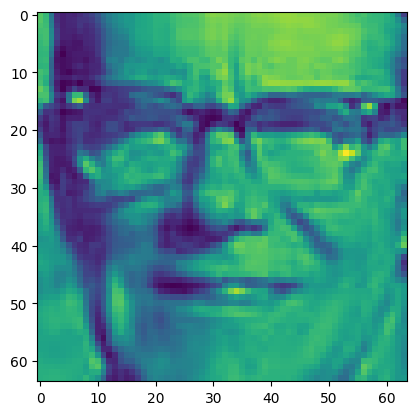

In [17]:
import matplotlib.pyplot as plt
import os
import glob
import numpy as np


# The load data function loads the files(images) from all the classes (f-d, f-s, m-d, m-s), prepares labels for the same
# and calls import_dir which performs the function to merge the parent and child images into a single image as required for
# input to the model.
# returns all images from all folders into parent-child image form.
def load_data(dirs):
    all_images = []
    all_labels = []
    combination= {}
    label = 1
    for dir in sorted(os.listdir(dirs)):
        dir_name = os.path.join(dirs, dir)
        images, num_of_files = import_dir(dir_name)
        all_images.append(images)
        all_labels.append([label for i in range(num_of_files)])
        print(dir_name)
        print(len(images))
        label += 1
    return all_images, all_labels 


# import_dir reads all files(images) for a given directory (say father-dau) and combines parent-child images to form a single
# 6 channel image which is used as input for the proposed model.
# The start variable is required to skip any thumbs.db file that may be present in the folder containing the images.
# return parent-child images for the given directory. 

def import_dir(dir_name):
    files = sorted(os.listdir(dir_name))
    dir_images = []
    start = 0
    if len(files)%2 != 0:
        start = 1
    for file1, file2 in zip(files[start::2], files[start+1::2]):
        images = np.zeros((64, 64, 6))
        #if file.split('.')[0][-1] == "1":
        parent = plt.imread(os.path.join(dir_name, file1))
        images[:,:,0:3] = parent
        #if file.split('.')[0][-1] == "2":
        child = plt.imread(os.path.join(dir_name, file2))
        images[:,:,3:6] = child
#       plt.imshow(images[:,:,5])
#       plt.show()
#       input(" .... ")
#       print(file)
        dir_images.append(images)
      
    return dir_images, len(dir_images)

dir_images, length = import_dir(r"E:\sai\Surya\KinFaceW-II\KinFaceW-II\images\father-dau")
plt.imshow(dir_images[78][:,:,1])

In [18]:
train_images, train_labels = load_data(r"E:\sai\Surya\KinFaceW-II\\KinFaceW-II\images")

E:\sai\Surya\KinFaceW-II\\KinFaceW-II\images\father-dau
250
E:\sai\Surya\KinFaceW-II\\KinFaceW-II\images\father-son
250
E:\sai\Surya\KinFaceW-II\\KinFaceW-II\images\mother-dau
250
E:\sai\Surya\KinFaceW-II\\KinFaceW-II\images\mother-son
250


In [19]:
train_img = np.r_[train_images[0], train_images[1], train_images[2], train_images[3]]
train_labels = np.r_[np.array(train_labels[0]), np.array(train_labels[1]), np.array(train_labels[2]), np.array(train_labels[3])]

In [20]:
test_images, test_labels = load_data(r"E:\sai\Surya\KinFaceW-I\KinFaceW-I\images")

E:\sai\Surya\KinFaceW-I\KinFaceW-I\images\father-dau
134
E:\sai\Surya\KinFaceW-I\KinFaceW-I\images\father-son
156
E:\sai\Surya\KinFaceW-I\KinFaceW-I\images\mother-dau
127
E:\sai\Surya\KinFaceW-I\KinFaceW-I\images\mother-son
116


In [21]:
test_img = np.zeros((len(test_images[0]) + len(test_images[1]) + len(test_images[2]) + len(test_images[3]), 64, 64, 6))
test_img = np.r_[test_images[0], test_images[1], test_images[2], test_images[3]]
test_lab = np.r_[np.array(test_labels[0]), np.array(test_labels[1]), np.array(test_labels[2]), np.array(test_labels[3])]
test_lab.shape

(533,)

In [22]:
from keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels - 1)
test_labels_cat = to_categorical(test_lab - 1)

In [23]:
# Prepare datagenerator for Data Augmetnation

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True) 

datagen.fit(train_img)

c:\Users\sainithin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\preprocessing\image.py:2093: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (1000, 64, 64, 6) (6 channels).
  warnings.warn(


In [24]:
from keras import layers
from keras import models
from keras import optimizers

In [36]:
from keras import layers
from keras import models
from keras.optimizers import SGD

def model_1():
    model = models.Sequential()
    model.add(layers.Conv2D(16, (5, 5), strides=1, padding='valid', activation='relu', input_shape=(64, 64, 6)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (2, 2), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(4, activation='softmax'))
    
    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)  # Use the updated SGD optimizer
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [40]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(train_labels_cat.argmax(axis=1)), y=train_labels_cat.argmax(axis=1))
class_weight_dict = dict(enumerate(class_weights))

# Create and compile the model (replace this with your actual model)
model = model_1()

# Data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Use flow method without repeat() for an infinite data generator
data_generator = datagen.flow(train_img / 255, train_labels_cat, batch_size=32)

# Train the model
history = model.fit(
    data_generator,
    steps_per_epoch=len(train_img) / 32,
    epochs=700,
    verbose=1,
    shuffle=True,
    validation_data=(test_img / 255, test_labels_cat),
    validation_steps=len(test_img) / 32,
    class_weight=class_weight_dict
)

c:\Users\sainithin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\preprocessing\image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1000, 64, 64, 6) (6 channels).
  warnings.warn(


Epoch 1/700
31/31 [==============================] - 3s 81ms/step - loss: 1.3900 - accuracy: 0.2220 - val_loss: 1.3862 - val_accuracy: 0.2983
Epoch 2/700
31/31 [==============================] - 2s 72ms/step - loss: 1.3837 - accuracy: 0.2750 - val_loss: 1.3887 - val_accuracy: 0.2589
Epoch 3/700
31/31 [==============================] - 2s 75ms/step - loss: 1.3702 - accuracy: 0.3210 - val_loss: 1.3861 - val_accuracy: 0.2495
Epoch 4/700
31/31 [==============================] - 2s 73ms/step - loss: 1.3593 - accuracy: 0.3160 - val_loss: 1.4401 - val_accuracy: 0.2683
Epoch 5/700
31/31 [==============================] - 2s 74ms/step - loss: 1.3481 - accuracy: 0.3550 - val_loss: 1.4033 - val_accuracy: 0.2383
Epoch 6/700
31/31 [==============================] - 2s 72ms/step - loss: 1.3447 - accuracy: 0.3310 - val_loss: 1.3930 - val_accuracy: 0.2964
Epoch 7/700
31/31 [==============================] - 2s 71ms/step - loss: 1.3389 - accuracy: 0.3470 - val_loss: 1.4018 - val_accuracy: 0.2852
Epoch 

In [ ]:
model.evaluate(test_img/255, test_labels_cat, batch_size=15)

36/36 [==============================] - 0s 6ms/step - loss: 1.4019 - accuracy: 0.3096


[1.4018563032150269, 0.30956849455833435]

In [ ]:
model.save("model_with_data_augmentation")
models.load_model("model_with_data_augmentation")

INFO:tensorflow:Assets written to: model_with_data_augmentation\assets


INFO:tensorflow:Assets written to: model_with_data_augmentation\assets


from tkinter import *
from PIL import ImageTk, Image
from tkinter import filedialog
from tkinter import messagebox
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model

# Global variables to store file paths
f1 = None
f2 = None

def UploadAction1(event=None):
    global f1
    filename = filedialog.askopenfilename()
    button2['state'] = 'normal'
    print('Selected:', filename)
    img = Image.open(filename)
    
    # Use BICUBIC instead of ANTIALIAS if it's not available
    resample_method = Image.BICUBIC if hasattr(Image, 'BICUBIC') else Image.ANTIALIAS
    
    img = img.resize((64, 64), resample=resample_method)
    photo = ImageTk.PhotoImage(img)

    label = Label(image=photo)
    label.image = photo
    label.grid(column=0, row=3)

    f1 = filename

def UploadAction2(event=None):
    global f2
    filename = filedialog.askopenfilename()
    print('Selected:', filename)
    submit['state'] = 'normal'
    img = Image.open(filename)
    
    # Use BICUBIC instead of ANTIALIAS if it's not available
    resample_method = Image.BICUBIC if hasattr(Image, 'BICUBIC') else Image.ANTIALIAS
    
    img = img.resize((64, 64), resample=resample_method)
    photo = ImageTk.PhotoImage(img)

    label = Label(image=photo)
    label.image = photo
    label.grid(column=10, row=3)

    f2 = filename

def SubmitAction():
    if f1 is not None and f2 is not None:
        # form the parent-child image from the uploaded files
        image = np.zeros((64, 64, 6))
        parent = plt.imread(f1)
        image[:, :, 0:3] = parent
        child = plt.imread(f2)
        image[:, :, 3:6] = child

        # pass this input to the model to make a prediction
        prediction = model.predict(image.reshape(1, 64, 64, 6))
        predicted_class = np.argmax(prediction)

        result = ""
        # Interpret the result based on the predicted class
        if predicted_class == 0:
            result = "The relationship is father-daughter"
        elif predicted_class == 1:
            result = "The relationship is father-son"
        elif predicted_class == 2:
            result = "The relationship is mother-daughter"
        elif predicted_class == 3:
            result = "The relationship is mother-son"

        # Display the class result in a new dialog box.
        msg = messagebox.showinfo("Classification", result)





# GUI setup
window = Tk()
window.title("GUI")
window.geometry("300x200")
window.configure(background='grey')

button1 = Button(window, text='Upload Image 1', command=UploadAction1)
button1.grid(column=0, padx=10, pady=4, row=1)

button2 = Button(window, text='Upload Image 2', command=UploadAction2, state=DISABLED)
button2.grid(column=10, padx=10, pady=4, row=1)

submit = Button(window, text='Submit', command=SubmitAction, state=DISABLED)
submit.grid(column=3, row=5)

window.mainloop()


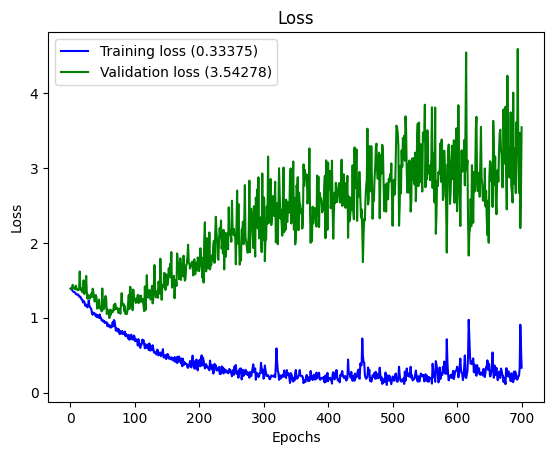

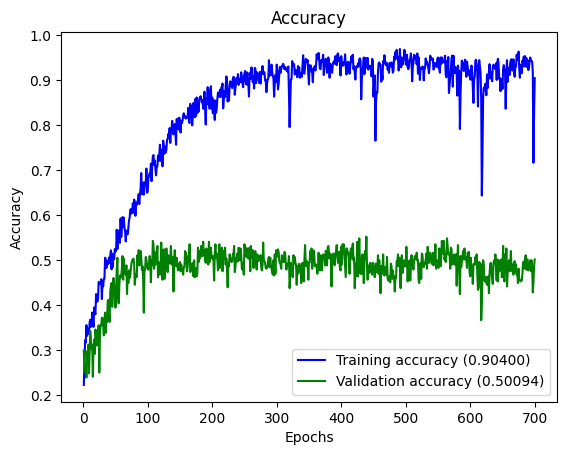

In [41]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


plot_history(history)